In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Helper Functions
def compute_dtft(x, n, num_points=8192):
    """
    Compute DTFT of finite-length sequence x[n] for a dense grid of frequencies.
    Returns frequency grid (in radians/sample) and X(omega).
    """
    omega = np.linspace(-np.pi, np.pi, num_points)
    X = np.array([np.sum(x * np.exp(-1j * w * n)) for w in omega])
    return omega, X

def plot_time_signal(t, x, title, xlabel='Time (s)', ylabel='Amplitude'):
    plt.figure()
    plt.plot(t, x)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)

def plot_dtft(omega, X, fs, title):
    f = omega * fs / (2*np.pi)  # frequency in Hz
    mag = np.abs(X)
    plt.figure()
    plt.plot(f, mag)
    plt.title(title + ' — DTFT magnitude')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)

def plot_dft(x, fs, title):
    N = len(x)
    Xk = np.fft.fft(x)
    fk = np.fft.fftfreq(N, d=1/fs)
    Xk_shifted = np.fft.fftshift(Xk)
    fk_shifted = np.fft.fftshift(fk)
    plt.figure()
    plt.stem(fk_shifted, np.abs(Xk_shifted), basefmt=" ")
    plt.title(title + ' — DFT magnitude')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)


# General parameters
fs = 1000.0  # sampling frequency
t_duration = 1.0
t = np.arange(0, t_duration, 1/fs)
n = np.arange(len(t))

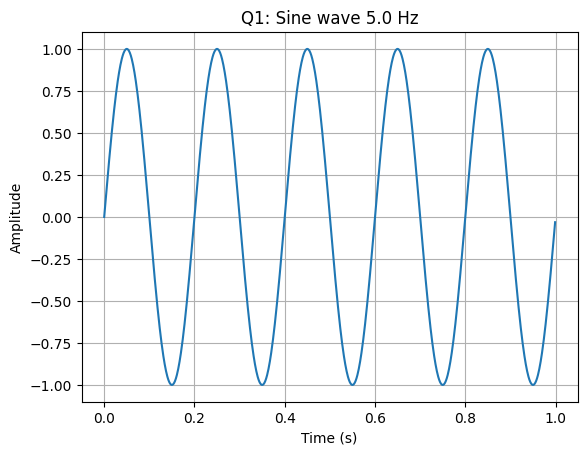

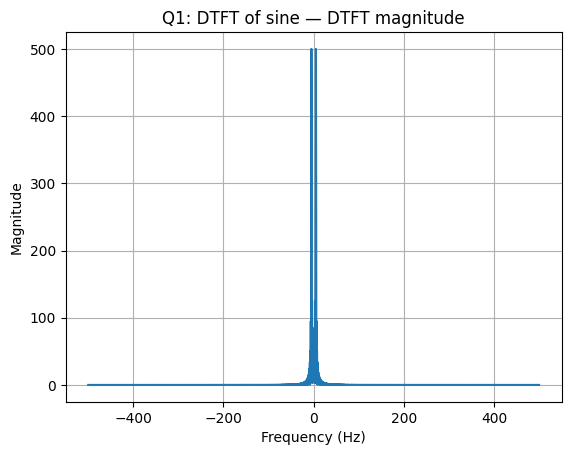

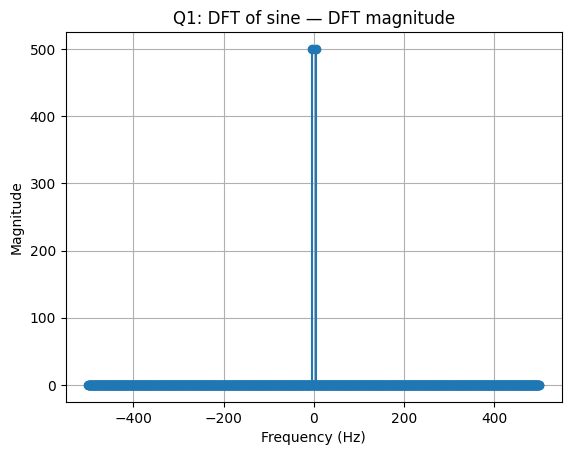

In [2]:
# -------------------------
# Question 1: Single Sinusoid
# -------------------------
f1 = 5.0
x1 = np.sin(2*np.pi * f1 * t)

plot_time_signal(t, x1, f'Q1: Sine wave {f1} Hz')
omega, X1 = compute_dtft(x1, n)
plot_dtft(omega, X1, fs, 'Q1: DTFT of sine')
plot_dft(x1, fs, 'Q1: DFT of sine')

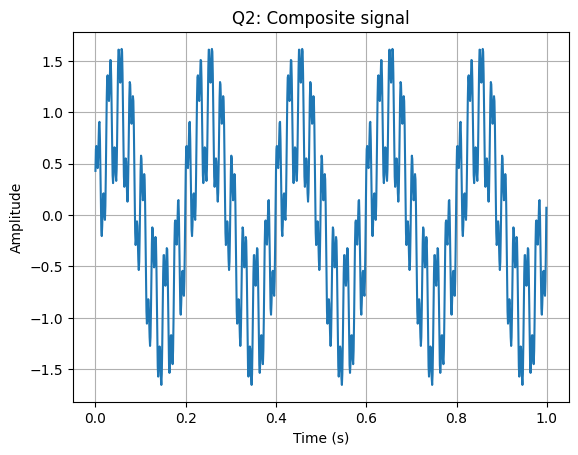

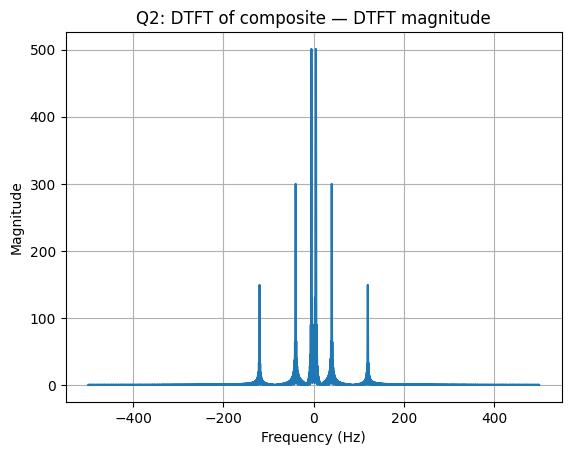

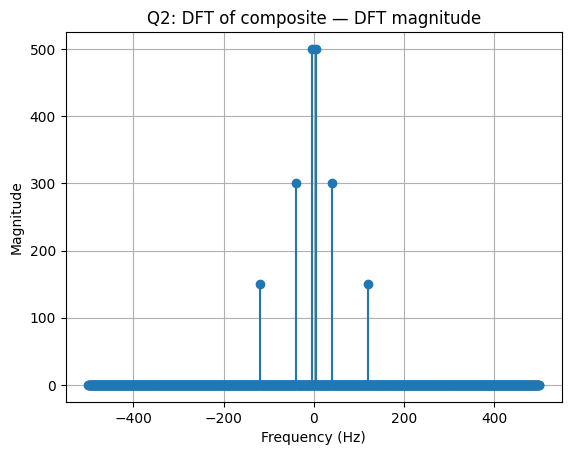

In [ ]:
# Question 2: Composite signal

f2a, A2a = 5.0, 1.0
f2b, A2b = 40.0, 0.6
f2c, A2c = 120.0, 0.3
x2 = A2a*np.sin(2*np.pi*f2a*t) + A2b*np.sin(2*np.pi*f2b*t + 0.3) + A2c*np.sin(2*np.pi*f2c*t + 1.0)

plot_time_signal(t, x2, 'Q2: Composite signal')
omega2, X2 = compute_dtft(x2, n)
plot_dtft(omega2, X2, fs, 'Q2: DTFT of composite')
plot_dft(x2, fs, 'Q2: DFT of composite')


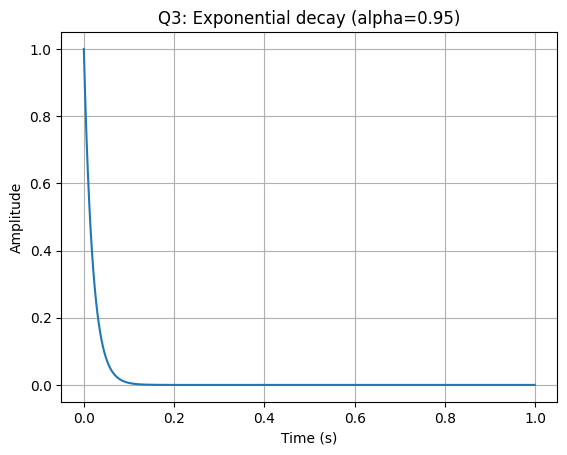

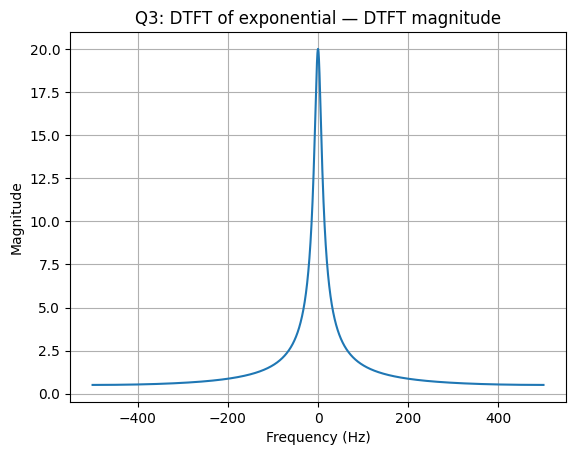

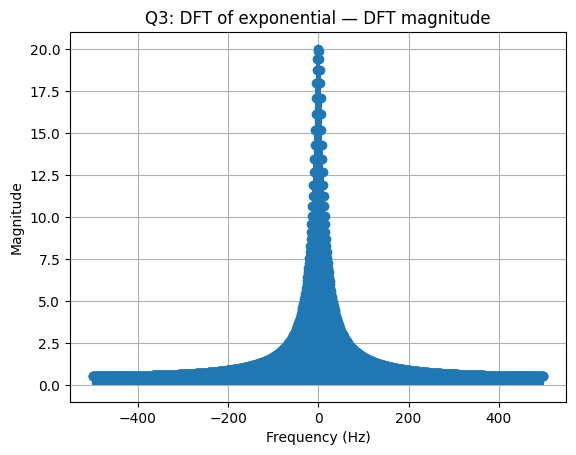

In [4]:

# -------------------------
# Question 3: Exponential
# -------------------------
alpha = 0.95
x3 = (alpha ** n) * (t >= 0)
plot_time_signal(t, x3, f'Q3: Exponential decay (alpha={alpha})')
omega3, X3 = compute_dtft(x3, n)
plot_dtft(omega3, X3, fs, 'Q3: DTFT of exponential')
plot_dft(x3, fs, 'Q3: DFT of exponential')


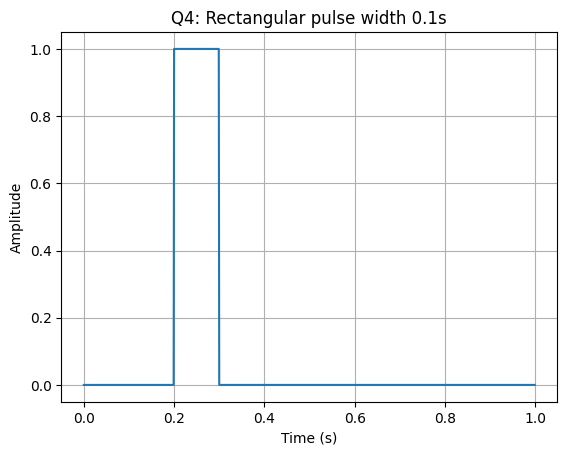

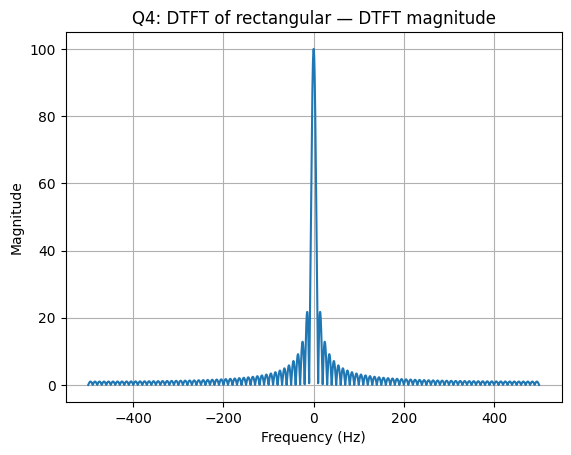

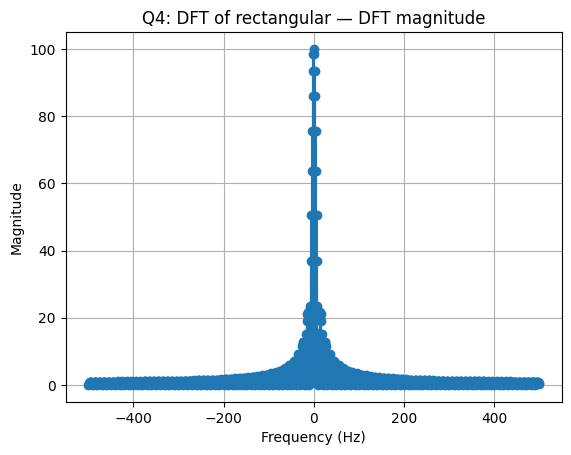

In [ ]:
# Question 4: Rectangular pulse
Tw = 0.1  # 100 ms
Npulse = int(np.round(Tw * fs))
x4 = np.zeros_like(t)
start_idx = int(0.2 * fs)
x4[start_idx : start_idx + Npulse] = 1.0

plot_time_signal(t, x4, f'Q4: Rectangular pulse width {Tw}s')
omega4, X4 = compute_dtft(x4, n)
plot_dtft(omega4, X4, fs, 'Q4: DTFT of rectangular')
plot_dft(x4, fs, 'Q4: DFT of rectangular')

In [ ]:
# Inferences
print("\n---- Inference Q3 (Exponential) ----")
print("Time-domain: Exponential decays over time.")
print("Frequency-domain: Smooth spectrum with peak at DC.")
print("Slower decay (alpha close to 1) → narrower spectrum; faster decay → wider spectrum.")

print("\n---- Inference Q4 (Rectangular Pulse) ----")
print("Time-domain: Finite rectangular shape with sharp edges.")
print("Frequency-domain: Sinc-like spectrum with main lobe + side lobes.")
print("Longer pulses → narrower spectrum; shorter pulses → wider spectrum.")


---- Inference Q3 (Exponential) ----
Time-domain: Exponential decays over time.
Frequency-domain: Smooth spectrum with peak at DC.
Slower decay (alpha close to 1) → narrower spectrum; faster decay → wider spectrum.

---- Inference Q4 (Rectangular Pulse) ----
Time-domain: Finite rectangular shape with sharp edges.
Frequency-domain: Sinc-like spectrum with main lobe + side lobes.
Longer pulses → narrower spectrum; shorter pulses → wider spectrum.
